In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
pd.set_option('display.max_columns', None)

In [2]:
housing_train = pd.read_csv('train.csv')
housing_test = pd.read_csv('test.csv')
Y_label =  housing_train['SalePrice'].copy()
all_data = pd.concat([housing_train, housing_test])
all_data["BsmtFinSF1"].info()

<class 'pandas.core.series.Series'>
Int64Index: 2919 entries, 0 to 1458
Series name: BsmtFinSF1
Non-Null Count  Dtype  
--------------  -----  
2918 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


In [3]:
for column in ['Alley',
                       'BsmtQual',
                       'BsmtCond',
                       'BsmtExposure',
                       'BsmtFinType1',
                       'BsmtFinType2',
                       'FireplaceQu',
                       'GarageType',
                       'GarageFinish',
                       'GarageQual',
                       'GarageCond',
                       'PoolQC',
                       'Fence',
                       'MiscFeature'
                ]:
    all_data[column]=all_data[column].fillna('None')
    
for column in ['MSZoning',
                       'Exterior1st',
                       'Exterior2nd',
                       'MasVnrType',
                       'Electrical',
                       'KitchenQual',
                       'Functional',
                       'SaleType',
                       'GarageYrBlt']:
    all_data[column]=all_data[column].fillna(all_data[column].mode()[0])
for column in ['LotFrontage',
                        'MasVnrArea',
                        'BsmtFinSF1',
                        'BsmtUnfSF',
                        'TotalBsmtSF',
                        'BsmtFullBath',
                        'GarageCars',
                        'GarageArea']:
    all_data[column]=all_data[column].fillna(all_data[column].median())

In [4]:
housing_train = housing_train.drop(['PoolArea'], axis=1)
housing_test = housing_test.drop(['PoolArea'], axis=1)
housing_train = housing_train.drop(['MoSold'], axis=1)
housing_test = housing_test.drop(['MoSold'], axis=1)
housing_train = housing_train.drop(['3SsnPorch'], axis=1)
housing_test = housing_test.drop(['3SsnPorch'], axis=1)
housing_train = housing_train.drop(['BsmtFinSF2'], axis=1)
housing_test = housing_test.drop(['BsmtFinSF2'], axis=1)
housing_train = housing_train.drop(['BsmtHalfBath'], axis=1)
housing_test = housing_test.drop(['BsmtHalfBath'], axis=1)
housing_train = housing_train.drop(['MiscVal'], axis=1)
housing_test = housing_test.drop(['MiscVal'], axis=1)
housing_train = housing_train.drop(['Id'], axis=1)
housing_test = housing_test.drop(['Id'], axis=1)
housing_train = housing_train.drop(['LowQualFinSF'], axis=1)
housing_test = housing_test.drop(['LowQualFinSF'], axis=1)
housing_train = housing_train.drop(['YrSold'], axis=1)
housing_test = housing_test.drop(['YrSold'], axis=1)
housing_train = housing_train.drop(['MSSubClass'], axis=1)
housing_test = housing_test.drop(['MSSubClass'], axis=1)
housing_train = housing_train.drop(['EnclosedPorch'], axis=1)
housing_test = housing_test.drop(['EnclosedPorch'], axis=1)
housing_train = housing_train.drop(['KitchenAbvGr'], axis=1)
housing_test = housing_test.drop(['KitchenAbvGr'], axis=1)
housing_test = housing_test.drop(['Utilities'], axis=1)
housing_train = housing_train.drop(['Utilities'], axis=1)
housing_test = housing_test.drop(['LandSlope'], axis=1)
housing_train = housing_train.drop(['LandSlope'], axis=1)
housing_test = housing_test.drop(['Street'], axis=1)
housing_train = housing_train.drop(['Street'], axis=1)

In [21]:
all_data.select_dtypes(np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,2005.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,NaN
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,NaN
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,NaN
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,2005.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,NaN


# Skewness

In [20]:
skew_df = pd.DataFrame(all_data.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(all_data[feature]))
skew_df

,Feature,Skew
0,Id,0.000000
1,MSSubClass,1.375457
2,LotFrontage,1.674852
3,LotArea,12.822431
4,OverallQual,0.197110
5,OverallCond,0.570312
6,YearBuilt,-0.599806
7,YearRemodAdd,-0.451020
8,MasVnrArea,2.613592
9,BsmtFinSF1,1.425378


# Distplot

## LotFrontage

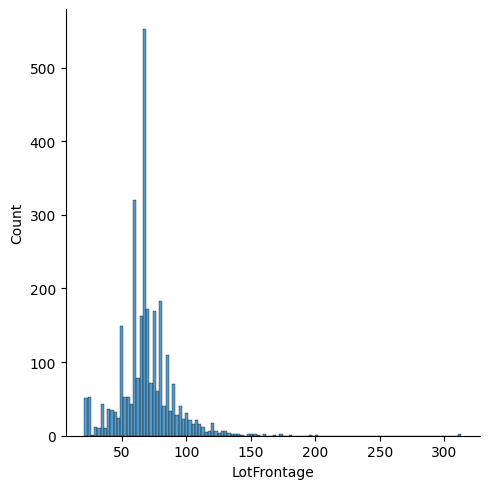

In [7]:
sns.displot(all_data["LotFrontage"])

## LotArea

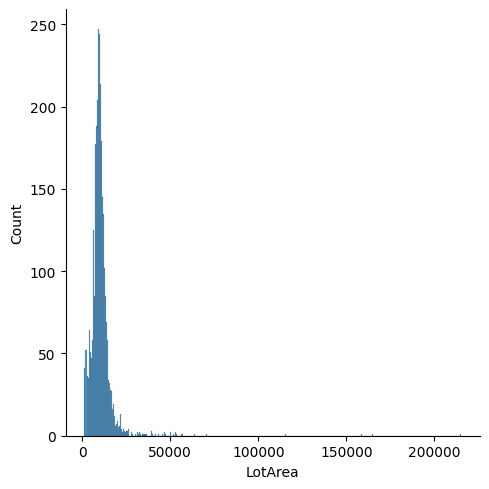

In [8]:
sns.displot(all_data["LotArea"])

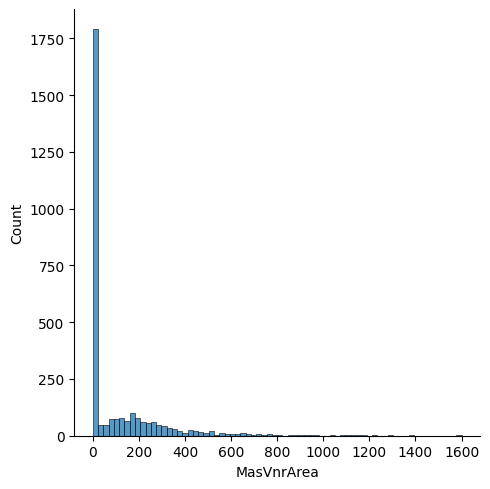

In [9]:
sns.displot(all_data["MasVnrArea"])

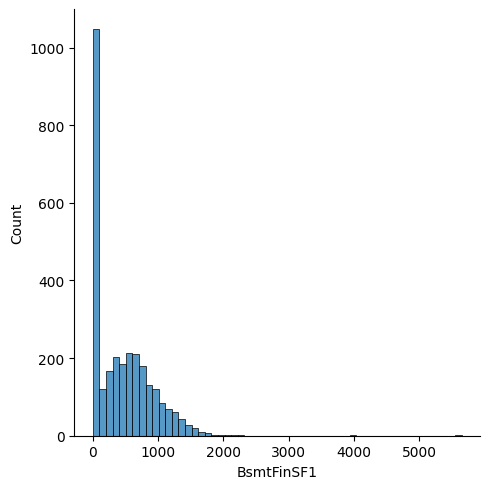

In [10]:
sns.displot(all_data["BsmtFinSF1"])

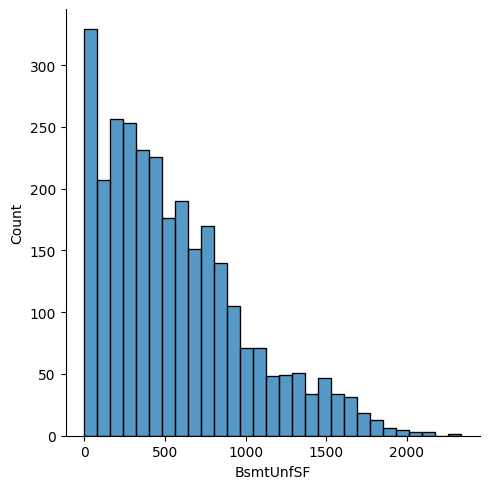

In [11]:
sns.displot(all_data["BsmtUnfSF"])

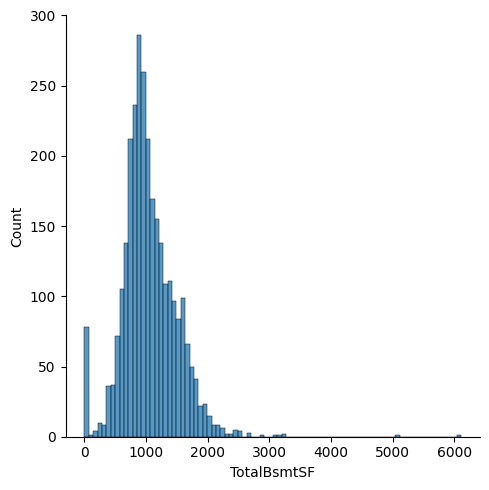

In [12]:
sns.displot(all_data["TotalBsmtSF"])

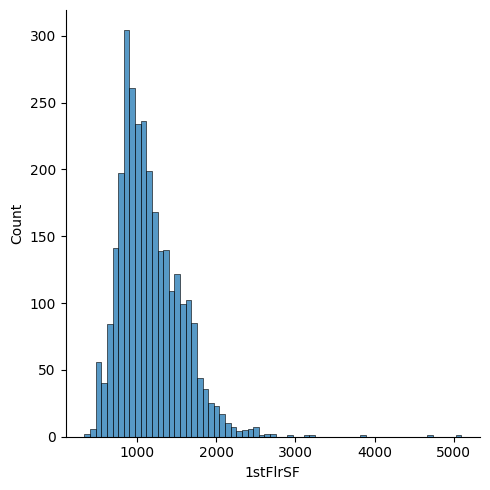

In [13]:
sns.displot(all_data["1stFlrSF"])

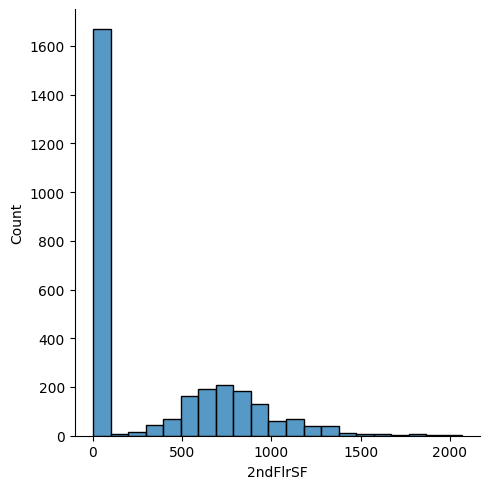

In [14]:
sns.displot(all_data["2ndFlrSF"])

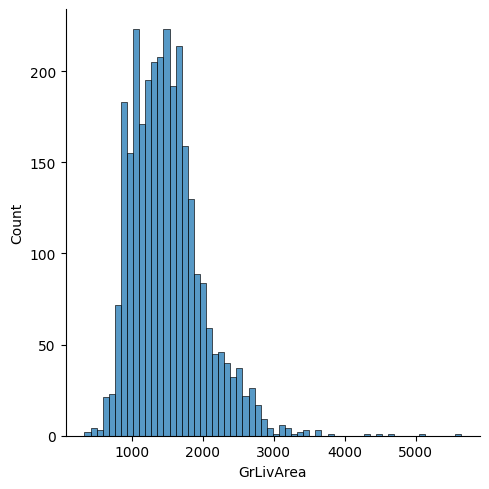

In [15]:
sns.displot(all_data["GrLivArea"])

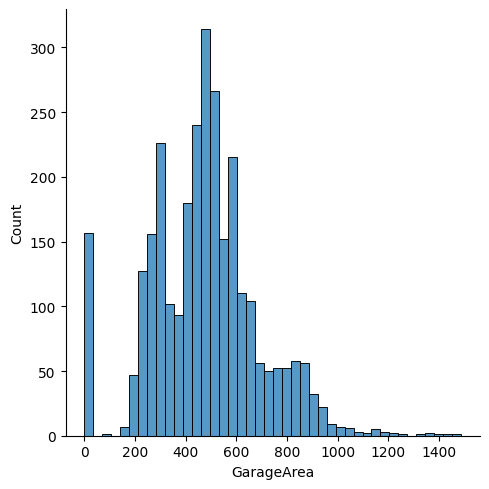

In [16]:
sns.displot(all_data["GarageArea"])

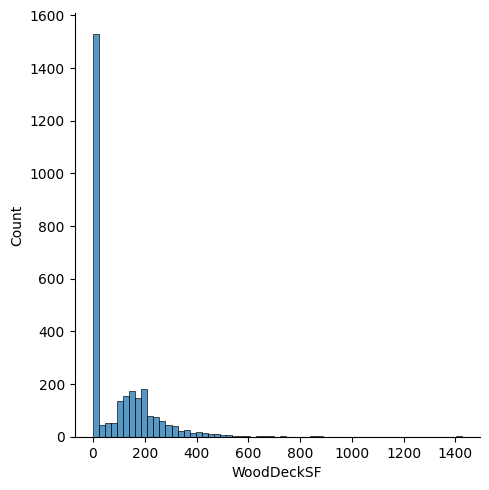

In [17]:
sns.displot(all_data["WoodDeckSF"])